App Stat 2016 exam:

## Import functions

In [21]:
#Other good imports                        
from numpy.linalg import matrix_power                                                                       
from iminuit import Minuit                                                                 
from scipy.integrate import quad
import sympy as sp
from sympy import integrate , print_latex
import pandas as pd
from IPython.display import display


#Packages needed for the external functions
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import roc_curve, auc
from iminuit.util import make_func_code
from iminuit import describe 


# import sequence of functions from external file
import sys 
sys.path.append('../External_Functions')
from MyExternalFunctions import *

Matplotlib_settings()

## 1) 


### 1.1) 

In [22]:
# Two games of dice, each giving the player equal odds are played. In the first game played 
# with one dice, the player wins if getting one six in 4 rolls, while in the second game played with
# two die, the player wins if getting two sixes (at the same time) in 24 rolls (with two die).
# Calculate the odds of winning in both games. Which game would you play, if either?

# we are here talking about the probability of 1 six or more in 4 rolls and 2 sixes or more in 24 rolls

p_1dice_fail = 5/6              # 6 possible outcomes, 5 of them are not 6
p_2dice_fail = 35/36            # 36 possible outcomes, 35 of them are not 2 sixes


# calculated directly: 

probability_game1 = 1 - (p_1dice_fail)**4
probability_game2 = 1 - (p_2dice_fail)**24

print(f'Probability of winning game1: {probability_game1:.3f}')
print(f'Probability of winning game2: {probability_game2:.3f}')

# calculated with survival function:

probability_game1 = stats.binom.sf(3, 4, p_1dice_fail)             # sf gives the probability of getting 3 or less non-sixes
probability_game2 = stats.binom.sf(23, 24, p_2dice_fail)           # sf gives the probability of getting 23 or less non-sixes

print(f'Probability of winning game1: {1-probability_game1:.3f}')
print(f'Probability of winning game2: {1-probability_game2:.3f}')

# calculated with probability mass function:

probability_game1 = stats.binom.pmf(4, 4, p_1dice_fail)           # pmf gives the probability of getting exactly 4 non-sixes
probability_game2 = stats.binom.pmf(24, 24,p_2dice_fail)          # pmf gives the probability of getting exactly 24 non-sixes

print(f'Probability of winning game1: {1-probability_game1:.3f}')
print(f'Probability of winning game2: {1-probability_game2:.3f}')



probability_game1 = stats.binom.cdf(0, 4, 1/6)                  # cdf gives the probability of getting 0 sixes
probability_game2 = stats.binom.cdf(0, 24,1/36)                 # cdf gives the probability of getting 0 pairs of sixes

print(f'Probability of winning game1: {1-probability_game1:.3f}')
print(f'Probability of winning game2: {1-probability_game2:.3f}')



Probability of winning game1: 0.518
Probability of winning game2: 0.491
Probability of winning game1: 0.518
Probability of winning game2: 0.491
Probability of winning game1: 0.518
Probability of winning game2: 0.491
Probability of winning game1: 0.518
Probability of winning game2: 0.491


### 1.2) 

In [23]:
# The IceCube experiment has been running for 1730 days, and has for a particular
# analysis found an average random background rate of 18.9 events per day.
# 1.2.1) What distribution should the daily number of (background) events follow?
print('It should be poisson distributed, since the number of events is discrete but lives in a countinous time-domain. lambda is average background rate pr. day: 18.9')



# 1.2.2) If the experiment in a single day saw 42 events, would that signify a statistically significant excess
lambda_icecube = 18.9
p_local_icecube = stats.poisson.sf(41, lambda_icecube)                              # sf gives the probability of getting 42 or more events
print(f'Probability of seeing 42 events in a single day: {p_local_icecube:.7f}')

p_global_icecube = 1-(1-p_local_icecube)**(1730)
print(f'Probability of seeing 42 events during the 1730 days: {p_global_icecube:.7f}')

It should be poisson distributed, since the number of events is discrete but lives in a countinous time-domain. lambda is average background rate pr. day: 18.9
Probability of seeing 42 events in a single day: 0.0000032
Probability of seeing 42 events during the 1730 days: 0.0054743


### 1.3)

In [24]:
# Assume that the height of Danish women follows a Gaussian distribution with a mean of 1.68 m and a standard deviation of 0.06 m.

# 1.3.1) What fraction of women are taller than 1.85 m?

mu = 1.68
sigma = 0.06
p_taller_than_185 = stats.norm.sf(1.85, mu, sigma)
print(f'Fraction taller than 1.85 m: {p_taller_than_185:.3f}')




# 1.2.2) Find (possibly numerically) the average height of the 20% tallest women?

height_20_tallest = stats.norm.ppf(1-0.2, mu, sigma)                                        #ppf gives the value of the distribution at a given probability
print(f'Average height of the 20% tallest is {height_20_tallest:.3f} m')


Fraction taller than 1.85 m: 0.002
Average height of the 20% tallest is 1.730 m


## 2) 

### 2.1) 

In [25]:
# The resistance of a cylindrical resistor is proportional to the length L, and inversel proportional to the cross sectional area A = πr2.
# 2.1.1) What should the relation between the relative uncertainties on L and r be for them to contribute equally to the uncertainty on the resistance?

resistance_eq, resistance_func , resistance_func_err, resistance_contrib = Errorpropagation('L/(pi*r**2)', 'L r')

sig_L = resistance_contrib[0]
sig_r = resistance_contrib[1]

display(sig_L)
display(sig_r)

print(sp.solve(sig_L - sig_r, 'sigma_r / r'))

print('The relative uncertainty on L should be 1/2 of the relative uncertainty on r')


sigma_L**2/(pi**2*r**4)

4*L**2*sigma_r**2/(pi**2*r**6)

[-sigma_L/(2*L), sigma_L/(2*L)]
The relative uncertainty on L should be 1/2 of the relative uncertainty on r


### 2.2) 

In [26]:
# A group of ten students have each measured the speed of a bullet, with results as follows:
v_bullet = [361, 200, 390, 223, 232, 248, 243, 386, 443, 378]           # m/s

# 2.2.1) Assuming independent measurements, what is the average speed and its uncertainty?
v_bullet_mean = np.mean(v_bullet)
v_bullet_std = np.std(v_bullet, ddof=1)
v_bullet_mean_err = v_bullet_std/np.sqrt(len(v_bullet))
print(f'2.2.1) Average speed: ({v_bullet_mean:.1f} +/- {v_bullet_mean_err:.1f}) m/s')


# 2.2.2) Given mbullet = 8.4 ± 0.5 g, what is the average kinetic energy, Ekin and its uncertainty?
m_bullet = 0.0084
m_bullet_err = 0.0005

ekin_eq, ekin_func , ekin_func_err, ekin_contrib = Errorpropagation('0.5*m*v**2', 'v m')


Ekin = ekin_func(v_bullet_mean, m_bullet)
Ekin_err = ekin_func_err(v_bullet_mean, m_bullet, v_bullet_mean_err, m_bullet_err)

print(f'2.2.2) Average kinetic energy: ({Ekin:.1f} +/- {Ekin_err:.1f}) J')


# 2.2.3) Which uncertainty dominates in determining Ekin? And if speed and mass uncertainties are to contribute evenly, what “suitable” number of speed measurements is needed in total?
print('2.2.3)')
v_contrib = ekin_contrib[0]
m_contrib = ekin_contrib[1]

display(v_contrib)
display(m_contrib)

v_contribution = v_contrib.subs({'v':v_bullet_mean, 'm':m_bullet, 'sigma_v':v_bullet_mean_err, 'sigma_m':m_bullet_err})
m_contribution = m_contrib.subs({'v':v_bullet_mean, 'm':m_bullet,   'sigma_v':v_bullet_mean_err,'sigma_m':m_bullet_err})

print('v_contribution =',v_contribution)
print('m_contribution =',m_contribution)

#how mane
N = sp.symbols('N')
N_measurements = sp.solve((1/sp.sqrt(N))*v_contribution - m_contribution)

print('Number of v measurements needed in order for m and v to contribute equally:',N_measurements)




2.2.1) Average speed: (310.4 +/- 28.1) m/s
2.2.2) Average kinetic energy: (404.7 +/- 77.2) J
2.2.3)


1.0*m**2*sigma_v**2*v**2

0.25*sigma_m**2*v**4

v_contribution = 5376.29762361753
m_contribution = 580.185495961600
Number of v measurements needed in order for m and v to contribute equally: [85.8683009641701]


## 3) 

### 3.1)

3.1.1) Normalization constant C = 0.243
3.1.2) Inverse transformation method, since the function is invertable. However, on the domain [0.005,1] the acceptance-rejection method would also work, since the the function is bound. 
3.1.3) If the domain was expanded to either 0 or infinity, the inverse transformation method would be the only option, as the function would diverge in the limits.


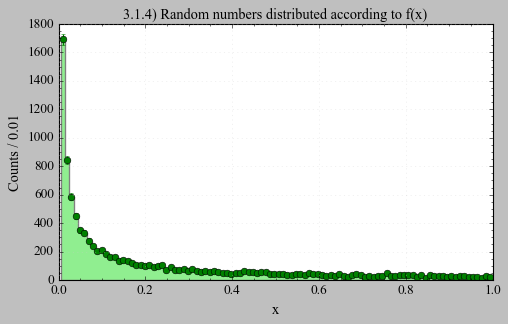

In [27]:
# Let f(x) = C*x**(−0.9) be proportional to a PDF for x ∈ [0.005, 1].

# 3.1.1) In order to fulfill the normalization criteria of a PDF, what value should C have?

#using my own function for the invers transformation method, as the function is invertable. 

f = 'x**(-0.9)'
x_min = 0.005
x_max = 1
N =10000

x_val , Normalization , f_inverse = inverse_transform(f,N, x_min, x_max)

#Normalization constant C
print(f'3.1.1) Normalization constant C = {Normalization:.3f}')


# 3.1.2) What method would you use to produce random numbers according to f(x)? Why?

print('3.1.2) Inverse transformation method, since the function is invertable. However, on the domain [0.005,1] the acceptance-rejection method would also work, since the the function is bound. ')

# 3.1.3) What would your answer be, if the allowed range was x ∈ [0, 1]?
print('3.1.3) If the domain was expanded to either 0 or infinity, the inverse transformation method would be the only option, as the function would diverge in the limits.')


# 3.1.4) Produce 10000 random numbers distributed according to f(x) and plot these.
easy_hist(x_val, xrange=(x_min,x_max),Nbins=100,Figsize=(7,4),title='3.1.4) Random numbers distributed according to f(x)');



mu = 10.81 +/- 0.06
sigma = 1.75 +/- 0.04
N = 989.42 +/- 31.54
Analytical expectation: mu_anal = 0.22
Nice fit! Good p-value and reduced chi2, i.e. nice Gaussian. Also the mean of the t values is very close to the analytical expectation, and the uncertainty is also very small.


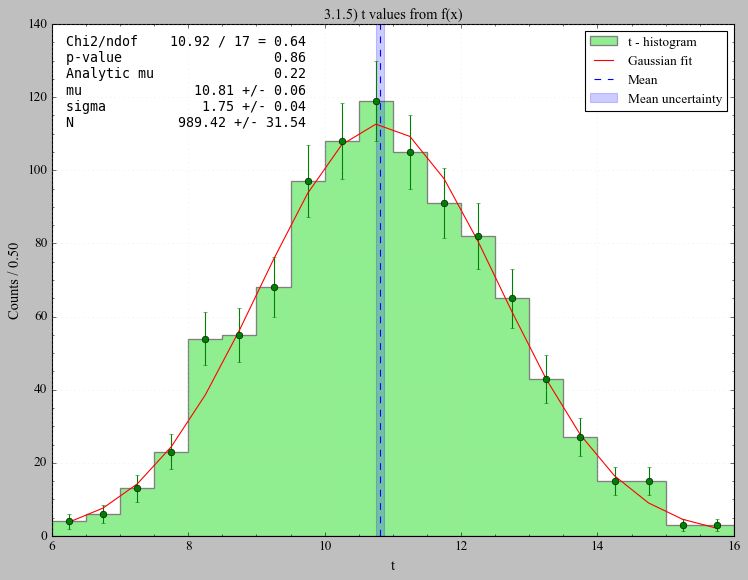

In [28]:
# 3.1.5) Let t be a sum of 50 random values from f(x), and generate 1000 values of t. Do they follow a Gaussian distribution? And does their mean match the analytical expectation?
r = np.random.RandomState(42)
N_points = 1000
t = np.zeros(N_points)
for i in range(N_points):
    t[i] = np.sum(r.choice(x_val, 50))


fig, ax, counts, bincenters, binwidth = easy_hist(t, xrange=(6,16),Nbins=20,Figsize=(11,8),title='3.1.5) t values from f(x)',x_label='t');

def gauss(x,mu,sigma,N):
    return N*binwidth*stats.norm.pdf(x,mu,sigma)

chi2 = Chi2Regression(gauss, bincenters, counts, np.sqrt(counts))
minuit = Minuit(chi2, mu=11, sigma=3,N=500)
minuit.migrad()
mu, sigma, N = minuit.values
mu_err, sigma_err, N_err = minuit.errors
pval , chi2_string = Chi2prop(minuit,len(bincenters))




x = sp.Symbol('x')
pdf = x**(-0.9)
norm = sp.integrate(pdf, (x, 0.005, 1))
mu_analytical = sp.integrate(x*pdf, (x, 0.005, 1))/norm





d = {'Chi2/ndof': chi2_string,  'p-value': pval, 'Analytic mu': float(mu_analytical), 
    'mu': [mu, mu_err], 'sigma': [sigma, sigma_err], 'N': [N, N_err]}

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.02, 0.98, text, ax, fontsize=12)





print(f'mu = {mu:.2f} +/- {mu_err:.2f}')
print(f'sigma = {sigma:.2f} +/- {sigma_err:.2f}')
print(f'N = {N:.2f} +/- {N_err:.2f}')




print(f'Analytical expectation: mu_anal = {mu_analytical:.2f}')



ax.plot(bincenters, gauss(bincenters, *minuit.values), 'r-')
ax.axvline(mu, color='b', linestyle='--')
ax.axvspan(mu-mu_err, mu+mu_err, color='b', alpha=0.2);
ax.legend(['t - histogram', 'Gaussian fit', 'Mean', 'Mean uncertainty']);


print('Nice fit! Good p-value and reduced chi2, i.e. nice Gaussian. Also the mean of the t values is very close to the analytical expectation, and the uncertainty is also very small.')


## 4) 

### 4.1)

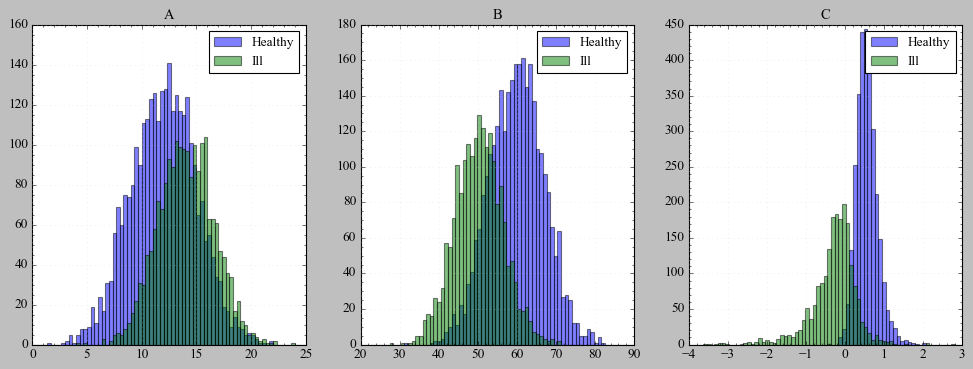

In [29]:
# Medical scientists are working hard to develope a cure for the dreaded Fisher Syndrome,
# a rare but debilitating condition that causes severely reduced ability to enjoy statistics problems.
# Preliminary research indicates that the disease may be correlated to levels of substances (A, B,
# and C) in the blood. Data with the levels of these substances from 3000 healthy (index 0) and 2000
# ill (index 1) people can be found at www.nbi.dk/∼petersen/data FisherSyndrome.txt.

# Load the data and plot the histograms of the three substances for the two groups using pandas and matplotlib.
dataframe = pd.read_csv('4-1 data.txt', sep='\s+',header=None)
dataframe.columns = ['Condition','index','A','B','C']
healthy = dataframe[dataframe['Condition'] == 0]
ill = dataframe[dataframe['Condition'] == 1]

#remove condition and index columns'
healthy = healthy.drop(['Condition','index'], axis=1)
ill = ill.drop(['Condition','index'], axis=1)

hA , hB , hC = healthy['A'].values, healthy['B'].values, healthy['C'].values
iA , iB , iC = ill['A'].values, ill['B'].values, ill['C'].values


Nbins = 75
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].hist(hA, bins=Nbins,range=(0,25), alpha=0.5, label='Healthy')
ax[0].hist(iA, bins=Nbins,range=(0,25), alpha=0.5, label='Ill')
ax[0].set_title('A')
ax[0].legend()

ax[1].hist(hB, bins=Nbins, range=(20,90), alpha=0.5, label='Healthy')
ax[1].hist(iB, bins=Nbins, range=(20,90), alpha=0.5, label='Ill')
ax[1].set_title('B')
ax[1].legend()

ax[2].hist(hC, bins=Nbins, range=(-4,3),  alpha=0.5, label='Healthy')
ax[2].hist(iC, bins=Nbins, range=(-4,3), alpha=0.5, label='Ill')
ax[2].set_title('C')
ax[2].legend();

Shapiro-Wilk test:
w-value: 1.00 ,  p-value: 0.85456258059
Anderson-Darling test:
Uncut: a-value: 0.32
critical values:  [0.575 0.655 0.785 0.916 1.09 ]
significance levels:  [15.  10.   5.   2.5  1. ]
CONCLUSION: According to both the Gaussian fit and the S-W and A-D test the null hypothesis that the data is drawn from a normal distribution cannot be rejected.


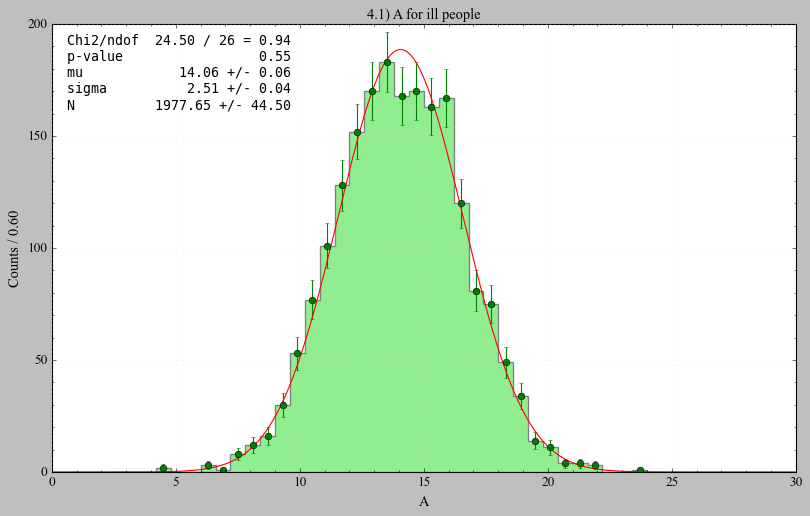

In [30]:
# 4.1) What distributions does A seem to follow for ill people? Quantify your statements.

#I expect a Gaussian distribution. First i will try to fit a gaussian to the data. 

fig , ax, counts, bincenters, binwidth = easy_hist(iA, xrange=(0,30),Nbins=50,Figsize=(12,7),title='4.1) A for ill people',x_label='A');

def gauss(x,mu,sigma,N):
    return N*binwidth*stats.norm.pdf(x,mu,sigma)

chi2 = Chi2Regression(gauss, bincenters, counts, np.sqrt(counts))
minuit = Minuit(chi2, mu=14, sigma=3.6,N=600)
minuit.migrad()
mu, sigma, N = minuit.values
mu_err, sigma_err, N_err = minuit.errors
pval , chi2_string = Chi2prop(minuit,len(bincenters))

d = {'Chi2/ndof': chi2_string,  'p-value': pval,  
    'mu': [mu, mu_err], 'sigma': [sigma, sigma_err], 'N': [N, N_err]}

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.02, 0.98, text, ax, fontsize=12)

x = np.linspace(0,30,1000)
ax.plot(x, gauss(x, *minuit.values), 'r-')

# Quite a nice fit. Now I will use the Shapiro-Wilk and the Anderson-Darling test to see if the data is Gaussian distributed.


#shapiro-wilk test
w, p = stats.shapiro(iA)

print('Shapiro-Wilk test:')
print(f'w-value: {w:.2f} , ',f'p-value: {p:.11f}')



#anderson-darling test. Null hypothesis is that the data is drawn from a normal distribution
a, crit, sig = stats.anderson(iA, dist='norm')

print('Anderson-Darling test:')
print(f'Uncut: a-value: {a:.2f}')
print('critical values: ',crit)
print('significance levels: ',sig)


print('CONCLUSION: According to both the Gaussian fit and the S-W and A-D test the null hypothesis that the data is drawn from a normal distribution cannot be rejected.')

Pearson correlation coefficient is r=-0.39 with a p-value of non-correlation of  p=0.00
Pearson correlation coefficient calculated manually is r=-0.39


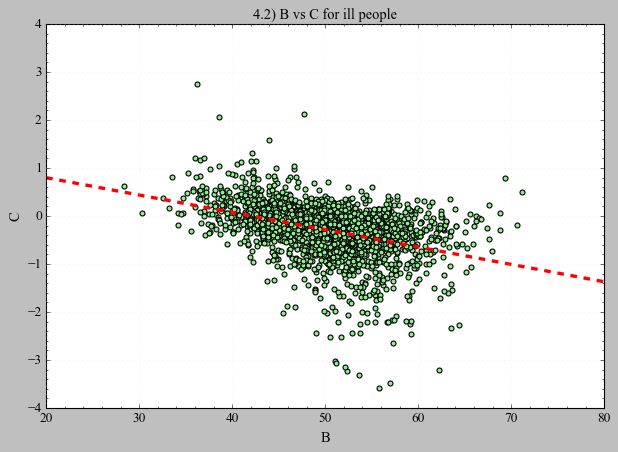

In [31]:
# 4.2) What is the linear correlation between variables B and C for ill people?

#I will use the Pearson correlation coefficient to quantify the linear correlation between B and C for ill people.

#Pearson correlation coefficient
r, p = stats.pearsonr(iB,iC)

print(f'Pearson correlation coefficient is r={r:.2f} with a p-value of non-correlation of  p={p:.2f}')

# the linear correlation can also be calculated using the covariance and the standard deviations of the two variables
cov = np.cov(iB,iC)
std = np.std(iB), np.std(iC)
r_manuel = cov[0,1]/(std[0]*std[1])

print(f'Pearson correlation coefficient calculated manually is r={r_manuel:.2f}')

# The correlation can quite clearly be seen in the scatter plot below, however it might not be linear.
fig, ax = plt.subplots(figsize=(9,6))
ax.scatter(iB,iC, c='lightgreen')
ax.set(xlabel='B', ylabel='C', title='4.2) B vs C for ill people', xlim=(20,80));

def linear(x,m,b):
    return m*x + b

chi2 = Chi2Regression(linear, iB, iC)
minuit = Minuit(chi2, m=0, b=0)
minuit.migrad()
x = np.linspace(20,80,1000)
ax.plot(x, linear(x, *minuit.values), 'r--', lw=3)

w1: [-1.32772328  0.62602279  1.93297834]


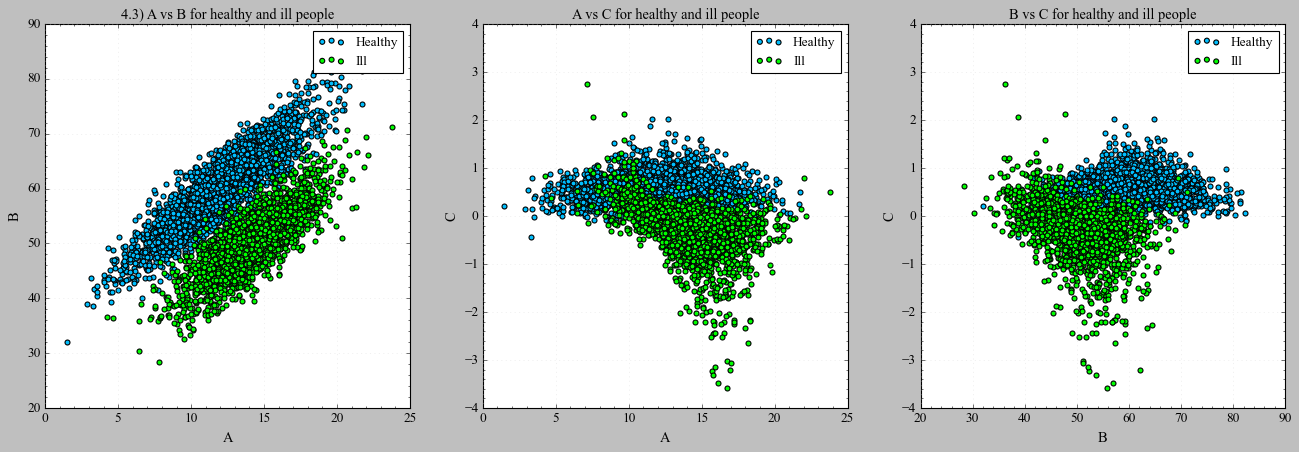

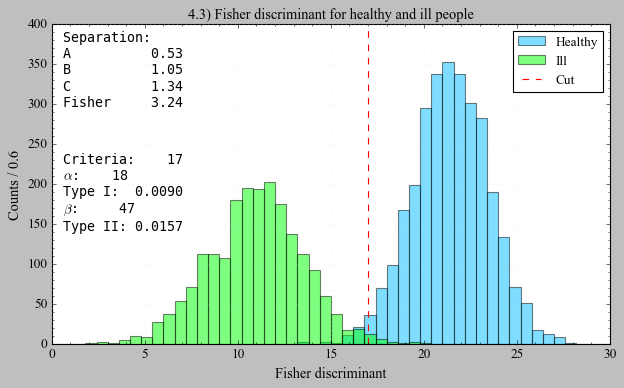

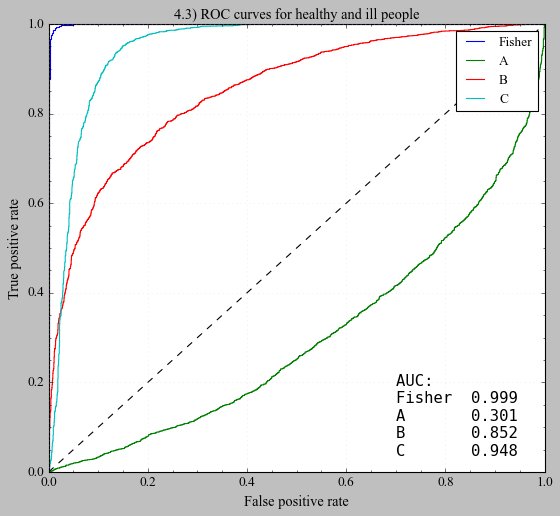

In [32]:
# 4.3) Using either of the three variables or any combination of these, what is the best separation 
# you can obtain between healthy and ill people? State your answer in terms of error rates of
# type I and II (i.e. α and β) for a selection criteria of your choice.


fig, ax = plt.subplots(ncols=3,nrows=1,figsize=(20,6))
ax[0].scatter(hA,hB, c='deepskyblue', label='Healthy')
ax[0].scatter(iA,iB, c='lime', label='Ill')
ax[0].set(xlabel='A', ylabel='B', title='4.3) A vs B for healthy and ill people')
ax[0].legend();

ax[1].scatter(hA,hC, c='deepskyblue', label='Healthy')
ax[1].scatter(iA,iC, c='lime', label='Ill')
ax[1].set(xlabel='A', ylabel='C', title='A vs C for healthy and ill people')
ax[1].legend();

ax[2].scatter(hB,hC, c='deepskyblue', label='Healthy')
ax[2].scatter(iB,iC, c='lime', label='Ill')
ax[2].set(xlabel='B', ylabel='C', title='B vs C for healthy and ill people')
ax[2].legend();

# Using the fisher discriminant to optimize the separation between healthy and ill people

fish_H, fish_I, sample_sep, fish_sep, w1 = fisher_2var(healthy,ill)

# calculating type I and type II error rates for the fisher discriminant with a cut at 17
cut = 17

#type I error rate
alpha = np.sum(fish_I>cut)
type_I = alpha/len(fish_I)

#type II error rate
beta = np.sum(fish_H<cut)
type_II = beta/len(fish_H)




Nbins = 50
xrange = (0,30)
binwidth = (xrange[1]-xrange[0])/Nbins

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(fish_H, bins=50, range=xrange, color='deepskyblue', label='Healthy', alpha=0.5)
ax.hist(fish_I, bins=50, range=xrange, color='lime', label='Ill', alpha=0.5)
ax.axvline(x=cut, color='r', linestyle='--', label='Cut')
ax.set(xlabel='Fisher discriminant', ylabel=f'Counts / {binwidth}', title='4.3) Fisher discriminant for healthy and ill people')
ax.legend();

print('w1:',w1)

d = {'Separation:': '',
        'A': sample_sep[0],
        'B': sample_sep[1],
        'C': sample_sep[2],
        'Fisher': fish_sep}

d2 = { 'Criteria:': cut,
        r'$\alpha$:': alpha,
        'Type I:': type_I,
        r'$\beta$:': beta,
        'Type II:': type_II}

text = nice_string_output(d, extra_spacing=0, decimals=2)
add_text_to_ax(0.02, 0.98, text, ax, fontsize=12)

text2 = nice_string_output(d2, extra_spacing=0, decimals=4)
add_text_to_ax(0.02, 0.6, text2, ax, fontsize=12)




#comparing the separation of the fisher discriminant with the separation of the variables with ROC curves

fish_fpr, fish_tpr, fish_auc = ROC_curve(fish_I,fish_H, plot=False)
A_fpr, A_tpr, A_auc = ROC_curve(iA,hA, plot=False)
B_fpr, B_tpr, B_auc = ROC_curve(iB,hB, plot=False)
C_fpr, C_tpr, C_auc = ROC_curve(iC,hC, plot=False)

fig,ax = plt.subplots(figsize=(8,7))
ax.plot([0,1],[0,1], 'k--')
ax.plot(fish_fpr, fish_tpr, label='Fisher')
ax.plot(A_fpr, A_tpr, label='A')
ax.plot(B_fpr, B_tpr, label='B')
ax.plot(C_fpr, C_tpr, label='C')
ax.set(xlabel='False positive rate', ylabel='True positive rate', title='4.3) ROC curves for healthy and ill people')
ax.legend();

d3 = {'AUC:': '',
        'Fisher': fish_auc,
        'A': A_auc,
        'B': B_auc,
        'C': C_auc}

text3 = nice_string_output(d3, extra_spacing=2, decimals=3)
add_text_to_ax(0.7, 0.22, text3, ax, fontsize=14)

## 5) 

### 5.1) 

<ErrorbarContainer object of 3 artists>

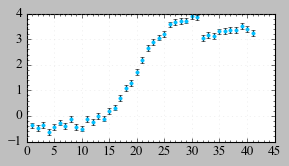

In [33]:
# Luke Lightning Lights is a manufacturer of solar powered flashlights. Their monthly income since startup y (in M$) has been recorded as a function of month x in the file
# www.nbi.dk/∼petersen/data LukeLightningLights.txt. The uncertainty on y has been
# estimated by the accountant to be σy = 0.11 M$.

#loading the data

data = np.loadtxt('5-1 data.txt')
x , _ , y, sigma_y = data.T


#plotting the data
fig, ax = plt.subplots(figsize=(4,2))
ax.errorbar(x,y, yerr=sigma_y, fmt='.', color='deepskyblue',ecolor='k', label='Data')

With a p-value of 0.025 we can reject the null hypothesis that the monthly income is constant on a 5% significance level


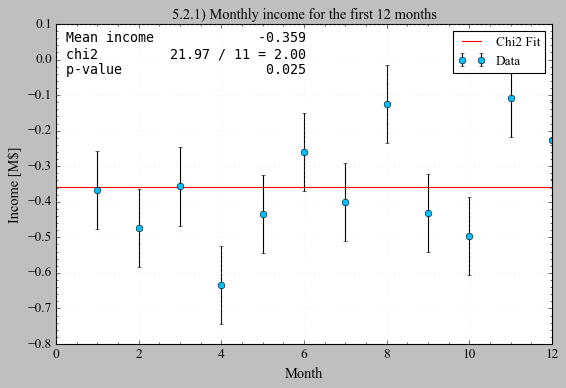

In [34]:

# 5.1.1) Consider the first twelve months, and test if the monthly income/deficit was constant.
# I will use a chi2 test to test if the monthly income/deficit was constant on a 5% significance level.

x12, y12, sigma_y12 = x[:12], y[:12], sigma_y[:12]

#plotting the data
fig, ax = plt.subplots(figsize=(8,5))
ax.errorbar(x12,y12, yerr=sigma_y12, fmt='o', color='deepskyblue',ecolor='k', label='Data')

#chi2 fitting a constant function

def constant(x, a):
    return a

chi2 = Chi2Regression(constant, x12, y12, sigma_y12)
minuit = Minuit(chi2, a=-0.35)
minuit.migrad()

pval , chi2string = Chi2prop(minuit,len(x12))

#plotting the fit
ax.axhline(y=minuit.values['a'], color='r', linestyle='-', label='Chi2 Fit')
ax.set(xlabel='Month', ylabel='Income [M$]', title='5.2.1) Monthly income for the first 12 months')
ax.legend();

d = {   'Mean income': minuit.values['a'],
        'chi2': chi2string,
        'p-value': pval}

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.98, text, ax, fontsize=12)


print(f'With a p-value of {pval:.3f} we can reject the null hypothesis that the monthly income is constant on a 5% significance level')

In [35]:
# 5.1.2) Assume an initial linear relation between x and y and do a χ2 fit to first twelve months. Is this hypothesis good? Extending the range, for how many months can this hypothesis be maintained?

def linear(x, a, b):
    return a*x + b

p_values = np.zeros(len(x))

i= 13
chi2 = Chi2Regression(linear, x[:i], y[:i], sigma_y[:i])
minuit = Minuit(chi2, a=0., b=-0.)
minuit.migrad()
pval , chi2string = Chi2prop(minuit,len(x12))
pval

0.024807232070331944

At 13 months the p-value is 0.068, and at 14 months the p-value is 0.025, so we can extend the null hypothesis that the monthly income is linear on a 5% significance level for 1 more month


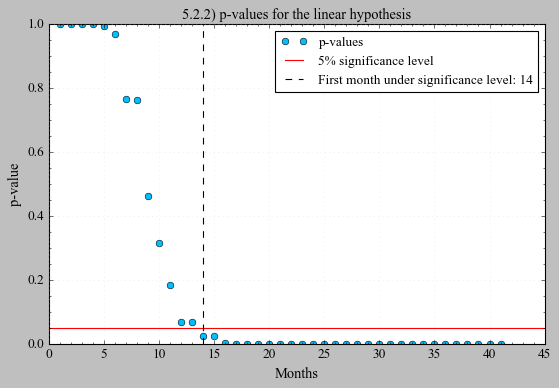

In [36]:
#chi2 fitting a linear function in a loop to see how many months the hypothesis can be maintained on a 5% significance level

def linear(x, a, b):
    return a*x + b

p_values = np.zeros(len(x))
for i in range(len(x)):
    chi2 = Chi2Regression(linear, x[:i], y[:i], sigma_y[:i])
    minuit = Minuit(chi2, a=0.1, b=-0.35)
    minuit.migrad()
    pval , chi2string = Chi2prop(minuit,len(x12))
    p_values[i] = pval

index = np.where(p_values<0.05)[0][0]
p_val_under_5percent = p_values[13]
x_under_5percent = x[index]


fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x, p_values ,'o', color='deepskyblue', label='p-values')
ax.axhline(y=0.05, color='r', linestyle='-', label='5% significance level')
ax.axvline(x=x_under_5percent, color='k', linestyle='--', label=f'First month under significance level: {x_under_5percent:.0f}')
ax.set(xlabel='Months', ylabel='p-value', title='5.2.2) p-values for the linear hypothesis')
ax.legend();


print(f'At 13 months the p-value is {p_values[12]:.3f}, and at 14 months the p-value is {p_values[13]:.3f}, so we can extend the null hypothesis that the monthly income is linear on a 5% significance level for 1 more month')


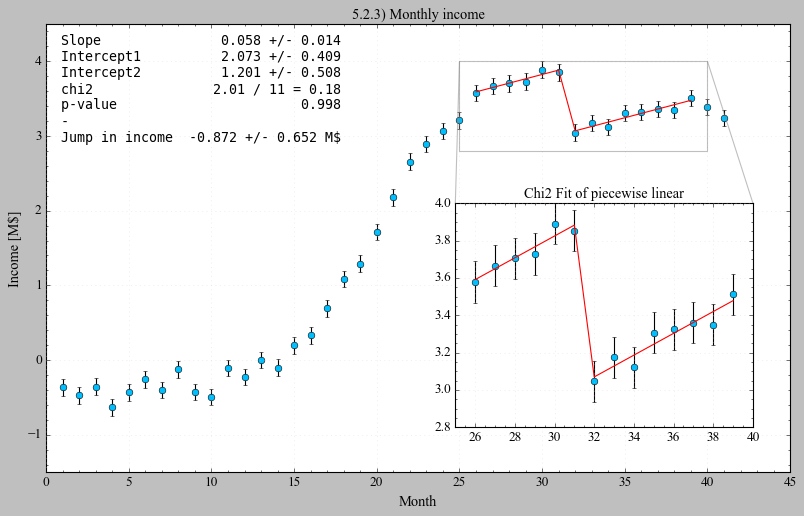

In [37]:
# 5.1.3) Due to a minor disruptive cost change following the 31st month, the income fell. Estimate the size of the change in income and its uncertainty.



fig, ax = plt.subplots(figsize=(12,7))
ax.errorbar(x,y, yerr=sigma_y, fmt='o', color='deepskyblue',ecolor='k', label='Data')
ax.set(xlabel='Month', ylabel='Income [M$]', title='5.2.3) Monthly income', ylim=(-1.5, 4.5))

#chi2 fitting a piecewise linear function with a jump at x=31 on a short range around x=31
fit_min, fit_max = 25 , 39
x31, y31, sigma_y31 = x[fit_min: fit_max], y[fit_min: fit_max], sigma_y[fit_min: fit_max] 

def piecewise_linear(x, a, b, c):
    return np.piecewise(x, [x <= 31, x > 31], [lambda x: a*x + b, lambda x: a*x + c])

chi2 = Chi2Regression(piecewise_linear, x31, y31, sigma_y31)
minuit = Minuit(chi2, a=10, b=2.5, c=1.5)
minuit.migrad()


pval , chi2string = Chi2prop(minuit,len(x31))

d = {   'Slope': [minuit.values['a'], minuit.errors['a']],
        'Intercept1': [minuit.values['b'], minuit.errors['b']],
        'Intercept2': [minuit.values['c'], minuit.errors['c']],
        'chi2': chi2string,
        'p-value': pval,
        '-':' ',
        'Jump in income': f'{minuit.values["c"]-minuit.values["b"]:.3f} +/- {np.sqrt(minuit.errors["c"]**2+minuit.errors["b"]**2):.3f} M$'}

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.98, text, ax, fontsize=12)


ax.plot(x31, piecewise_linear(x31, *minuit.values), color='r', linestyle='-', label='Chi2 Fit', zorder=10)
zoom_ax = ax.inset_axes([0.55, 0.1, 0.4, 0.5])
zoom_ax.errorbar(x31,y31, yerr=sigma_y31, fmt='o', color='deepskyblue',ecolor='k', label='Data')
zoom_ax.plot(x31, piecewise_linear(x31, *minuit.values), color='r', linestyle='-', label='Chi2 Fit', zorder=10)
zoom_ax.set(title='Chi2 Fit of piecewise linear', xlim=(25, 40))
ax.indicate_inset_zoom(zoom_ax);



#I first tried with to different slopes, but the loss of one degree of freedom was not worth it as the uncertainties better with one slope
#p values is high but not unreasonable

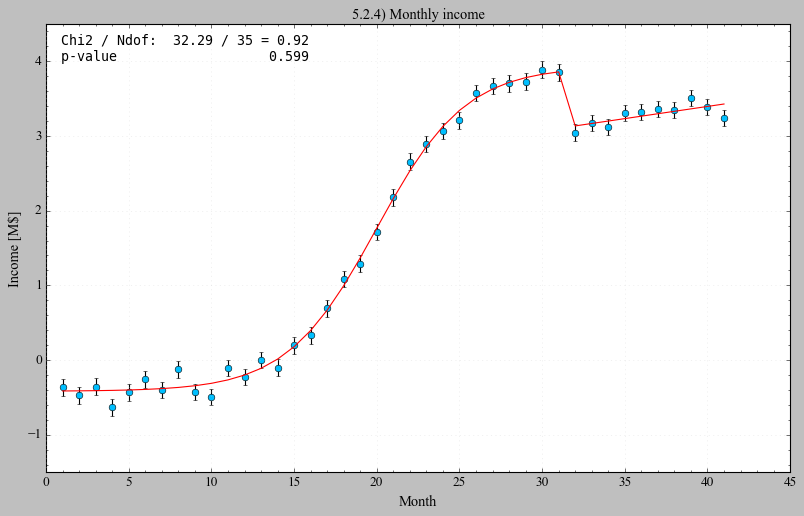

In [38]:
# 5.2.4) Try to fit the entire time range with one (or more) hypotheses and discuss its (their) validity

#chi2 fitting the entire time range a piecewise function that is a constant plus a sigmoid from 0 to 31 and from 31 and out linear with a jump of delta_y at x=31 



def piecewise_func(x, a,b, c, d, e,f):

    ranges = [x <= 31, x > 31]
    
    functions = [
                lambda x: a + c/(1+np.exp(-d*(x-e))),
                lambda x: b*x - f ,
                ]

    return np.piecewise(x, ranges, functions)




chi2 = Chi2Regression(piecewise_func, x, y, sigma_y)
minuit = Minuit(chi2, a=-0.36, b=0.3, c=1.5, d=0.1, e=20, f=0.872)
minuit.migrad()

pval, chi2string = Chi2prop(minuit,len(x))




fig, ax = plt.subplots(figsize=(12,7))
ax.errorbar(x,y, yerr=sigma_y, fmt='o', color='deepskyblue',ecolor='k', label='Data')
ax.set(xlabel='Month', ylabel='Income [M$]', title='5.2.4) Monthly income', ylim=(-1.5, 4.5))
ax.plot(x, piecewise_func(x, *minuit.values), color='r', linestyle='-', label='Chi2 Fit', zorder=10)

d = { 'Chi2 / Ndof:': chi2string,
      'p-value': pval}

text = nice_string_output(d, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.98, text, ax, fontsize=12)



### 5.2)

In [39]:
# 5.2)  A class of students have been timing a pendulum, and the residuals of these time measurements in seconds can be found at www.nbi.dk/∼petersen/data TimingResiduals.txt.
data = np.loadtxt('5-2 data.txt')

The typical uncertainty is 0.0879 s
The error on the std is 0.0021 s
 1/1726 = 0.0005793742757821553
(array([  42,   49,  311,  314,  325,  326,  330,  333,  334,  363,  413,
        415,  422,  426,  427,  428,  429,  537,  538,  546,  551,  559,
        561,  733,  742,  744,  947,  948,  973,  974,  975,  976,  997,
       1004, 1224, 1243, 1297, 1354, 1442, 1671], dtype=int64),)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.69                      │              Nfcn = 169              │
│ EDM = 7.82e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │  -0.0007  │  0.0015   │            │            │         │         │       │
│ 1 │ sigma │  0.0507   │  0.0020   │            │            │         │         │       │
│ 2 │ N     │  1.73e3   │  0.04e3   │            │            │         │         │       │
│ 3 │ nu    │   1.89    │   0.20    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │        mu     sigma         N        nu │
├───────┼─────────────────────────────────────────┤
│    mu │  2.29e-06  1.24e-07   0.00103 -6.69e-07 │
│ sigma │  1.24e-07   4.2e-06  -0.00743  0.000281 │
│     N │   0.00103  -0.00743  1.81e+03     -1.62 │
│    nu │ -6.69e-07  0.000281     -1.62    0.0401 │
└───────┴─────────────────────────────────────────┘

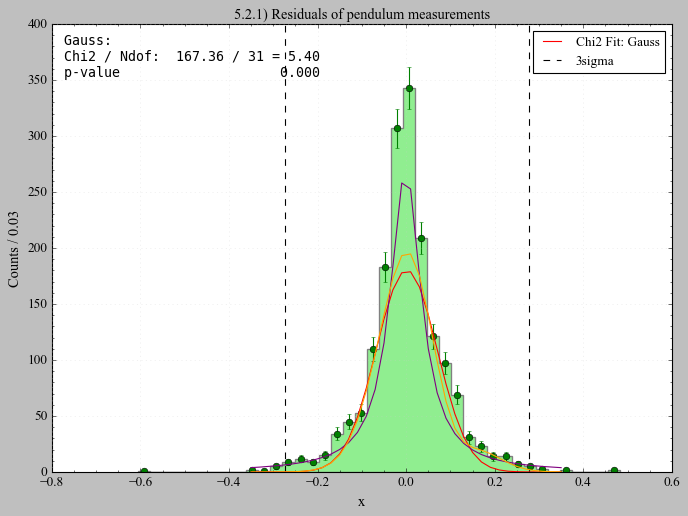

In [40]:
# 5.2.1) What is the typical timing uncertainty on one single measurement? And is the mean of the residuals consistent with zero?

#Assuming a gaussian distribution, the typical uncertainty is the standard deviation of the distribution

print(f'The typical uncertainty is {np.std(data):.4f} s')
print(f'The error on the std is {np.std(data)/np.sqrt(len(data)):.4f} s')


counts, bins, binwidth = binning(data,xrange=(-0.4,0.4), Nbins=40)
hist = easy_hist(data, Nbins=40, title='5.2.1) Residuals of pendulum measurements');

def gaussian(x, mu, sigma, N):
    return N*binwidth*stats.norm.pdf(x, mu, sigma)

chi2 = Chi2Regression(gaussian, bins, counts,  np.sqrt(counts))
minuit = Minuit(chi2, mu=0, sigma=1, N=1000)
minuit.migrad()
mu, sigma, N = minuit.values


hist[1].plot(bins, gaussian(bins, *minuit.values), color='r', linestyle='-', label='Chi2 Fit: Gauss', zorder=10)
hist[1].axvline(mu + 4*sigma, color='k', linestyle='--', label='3sigma')
hist[1].axvline(mu - 4*sigma, color='k', linestyle='--')
hist[1].legend(loc='upper right');



# 5.2.2) Based on the above answers and the size of the sample, do you find any of the residuals suspicious?

print(f' 1/{len(data)} = {1/len(data):}')


#i accept points within 3.5 sigma of the mean which is 99.995% of the data

print(np.where(np.abs(data-minuit.values['mu']) > 3.5*minuit.values['sigma']))

# 5.2.3) Fit the distribution with a Gaussian and comment on the quality of the fit. Done That!

pval, chi2string = Chi2prop(minuit,len(counts))

d1 = { 'Gauss:':'',
        'Chi2 / Ndof:': chi2string,
        'p-value': pval}

text = nice_string_output(d1, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.98, text, hist[1], fontsize=12)

# 5.2.4) Alternative PDFs: Try to fit the distribution with a Cauchy and a double gauss distribution. Comment on the quality of the fits.

def cauchy(x, mu, gamma, N):
    return N*binwidth*stats.cauchy.pdf(x, mu, gamma)

chi2 = Chi2Regression(cauchy, bins, counts,  np.sqrt(counts))
minuit = Minuit(chi2, mu=0.02, gamma=0.5, N=1000)
minuit.migrad()


hist[1].plot(bins, cauchy(bins, *minuit.values), color='purple', linestyle='-', label='Chi2 Fit: Cauchy', zorder=10)


def double_gauss(x, mu1, sigma1, N, mu2, sigma2, f):
    return N*(f*binwidth*stats.norm.pdf(x, mu1, sigma1) + (f-1)*binwidth*stats.norm.pdf(x, mu2, sigma2))

chi2 = Chi2Regression(double_gauss, bins, counts,  np.sqrt(counts))
minuit = Minuit(chi2, mu1=0.02, sigma1=0.01, N=1700, mu2=0.02, sigma2=0.15, f=0.7)
minuit.migrad()


hist[1].plot(bins, double_gauss(bins, *minuit.values), color='orange', linestyle='-', label='Chi2 Fit: Double Gauss', zorder=10)


def student_t(x, mu, sigma, N, nu):
    return N*binwidth*stats.t.pdf(x, nu, mu, sigma)

chi2 = Chi2Regression(student_t, bins, counts,  np.sqrt(counts))
minuit = Minuit(chi2, mu=0.02, sigma=0.5, N=1000, nu=3)
minuit.migrad()

